In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Data Generate

In [29]:
centers = [[1, 1], [-1, -3], [2, 2], [4, 8]]

# Generating X dataset
X, labels = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.5, random_state=42
)
# Adding outliers to dataset ...
outlier_x = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack((X, outlier_x))

# Applying Scaler ...
X = StandardScaler().fit_transform(X)

# Converting 2D-Numpy array to dataframe ...
X_df = pd.DataFrame(X)
X_df.columns = ['X1', 'X2']

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

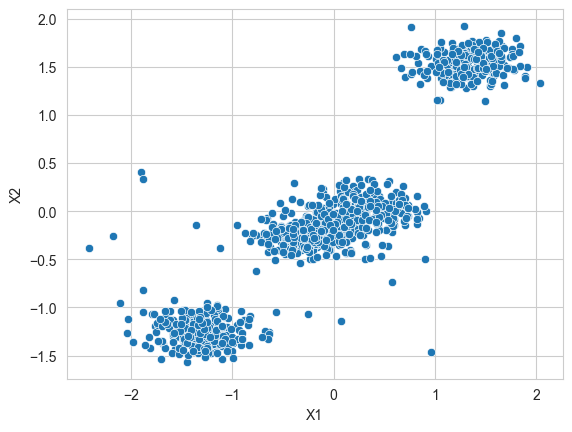

In [31]:
# Visualizing created dataset ...
sns.scatterplot(data=X_df, x='X1', y='X2')

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
# Setting model parameters 
epsilon = 0.3

# Fitting DBSCAN Model
dbscan = DBSCAN(eps=epsilon)
dbscan.fit(X)

DBSCAN(eps=0.3)

<Axes: xlabel='X1', ylabel='X2'>

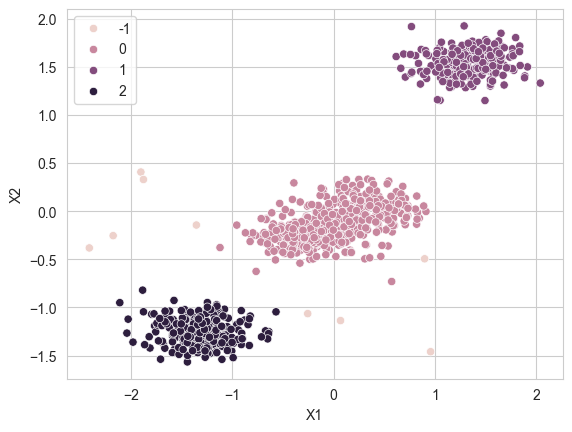

In [34]:
# Looking into Clusters
sns.scatterplot(data=X_df, x='X1', y='X2', hue=dbscan.labels_)

## Fitting KMeans in the same dataset

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Fitting a KMeans model for three clusters ...
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [23]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue=kmeans.labels_,)

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 1020 and the vector passed to `hue` has length 500.

Text(0.5, 1.0, 'DBSCAN')

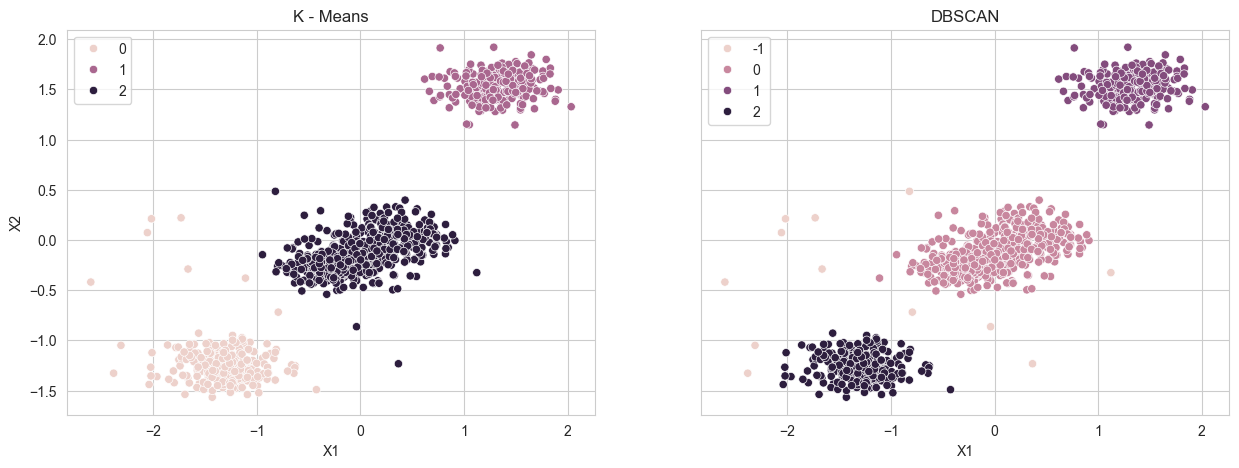

In [13]:
# Comparing both these results side by side ...
f, axis = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 5))
sns.scatterplot(data=X_df, x='X1', y='X2', hue=kmeans.labels_, ax=axis[0])
sns.scatterplot(data=X_df, x='X1', y='X2', hue=dbscan.labels_, ax=axis[1])
axis[0].set_title('K - Means')
axis[1].set_title('DBSCAN')

# Selection of K (No. of Clusters to be Formed)

## DBSCAN

In [14]:
import numpy as np
from sklearn.metrics import silhouette_score

In [15]:
# Generate sample data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Define range of eps values to evaluate
eps_values = np.arange(0.1, 2.0, 0.1)
silhouette_scores = []

# Test different eps values
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)  # min_samples can also be tuned
    labels = dbscan.fit_predict(X)

    # Ignore cases where all points are noise (-1 cluster)
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Assign worst score if all points are noise


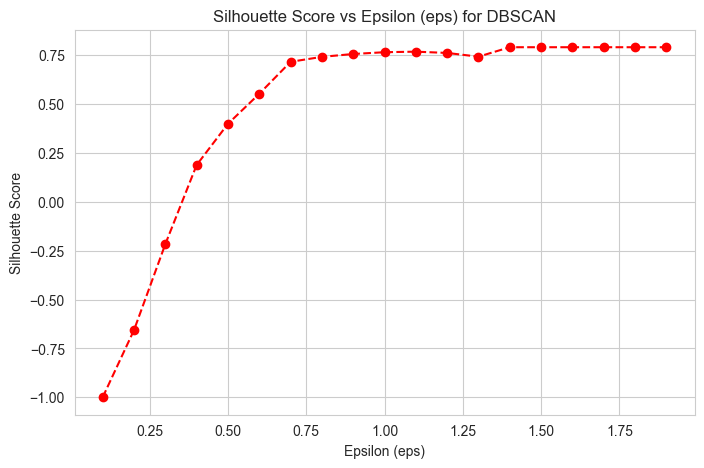

Optimal epsilon (eps): 1.4000000000000001


In [16]:
# Plot Silhouette Score vs eps
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Epsilon (eps) for DBSCAN")
plt.show()

# Find the best eps value
optimal_eps = eps_values[np.argmax(silhouette_scores)]
print(f"Optimal epsilon (eps): {optimal_eps}")

# KMeans

In [18]:
# Generate sample data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Define range of clusters to evaluate
k_values = range(2, 10)
silhouette_scores = []

In [19]:
# Compute silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

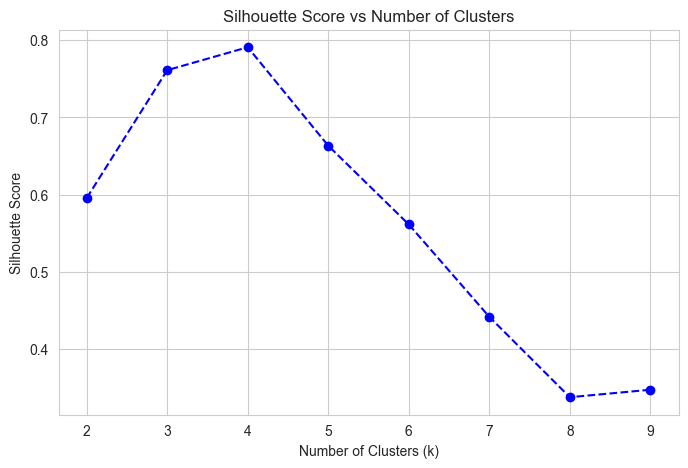

Optimal number of clusters: 4


In [20]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

# Print the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Clustering DB Vs Agglomerative

In [35]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

### Defining some concepts

In [36]:
# Generate sample data with clusters
n_samples = 300  # Number of data points
n_features = 2   # We are using 2D points for easy visualization
centers = [[1, 1], [-1, -1], [1, -1]]  # Cluster centers
cluster_std = 0.4  # Standard deviation of clusters

X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Standardize features (mean=0, variance=1) for better clustering performance
X = StandardScaler().fit_transform(X)

# Define DBSCAN parameters
epsilon = 0.3  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # Minimum number of samples in a neighborhood to form a cluster


In [37]:
# Apply DBSCAN clustering
clustering_dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels_dbscan = clustering_dbscan.labels_  # Cluster labels (-1 represents noise)

# Number of clusters (excluding noise) in DBSCAN
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Apply Agglomerative Clustering
n_clusters_agglo = 3  # Predefined number of clusters for Agglomerative Clustering
clustering_agglo = AgglomerativeClustering(n_clusters=n_clusters_agglo).fit(X)
labels_agglo = clustering_agglo.labels_

## Fitting and Plotting

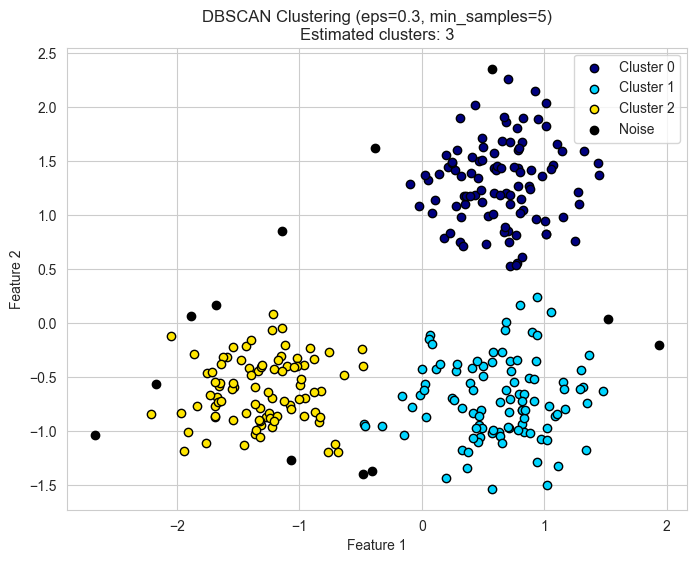

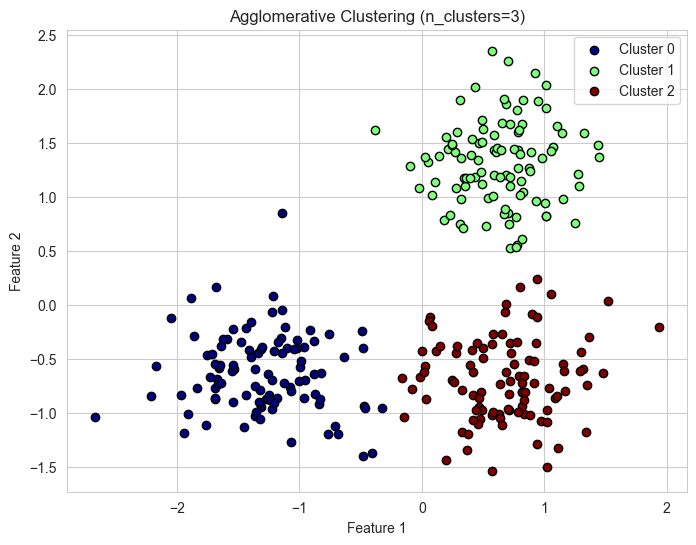

Silhouette Score for DBSCAN: 0.5936
Silhouette Score for Agglomerative Clustering: 0.6374


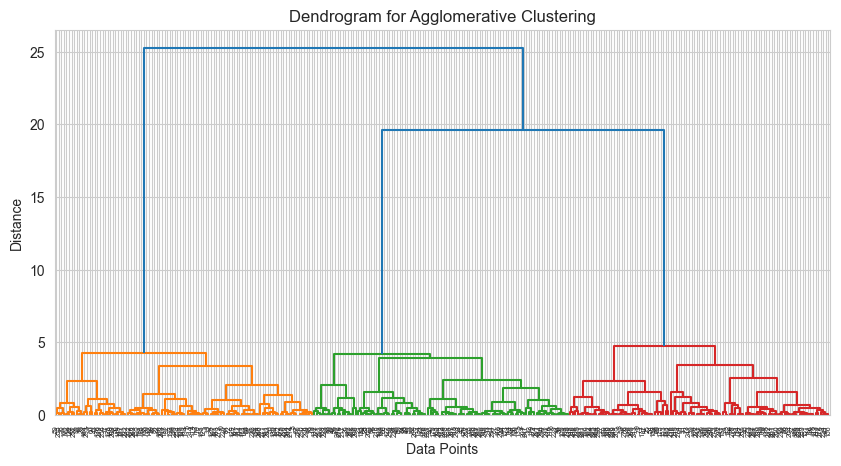

In [38]:
# Plot the DBSCAN results
unique_labels_dbscan = set(labels_dbscan)
colors_dbscan = [plt.cm.jet(each) for each in np.linspace(0, 1, len(unique_labels_dbscan))]

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels_dbscan, colors_dbscan):
    if label == -1:
        # Black for noise points
        color = (0, 0, 0, 1)

    mask = (labels_dbscan == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', edgecolors='k')

plt.title(f'DBSCAN Clustering (eps={epsilon}, min_samples={min_samples})\nEstimated clusters: {n_clusters_dbscan}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Plot the Agglomerative Clustering results
unique_labels_agglo = set(labels_agglo)
colors_agglo = [plt.cm.jet(each) for each in np.linspace(0, 1, len(unique_labels_agglo))]

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels_agglo, colors_agglo):
    mask = (labels_agglo == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=[color], label=f'Cluster {label}', edgecolors='k')

plt.title(f'Agglomerative Clustering (n_clusters={n_clusters_agglo})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Compute silhouette scores
if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(X, labels_dbscan)
else:
    silhouette_dbscan = -1  # Invalid silhouette score for single cluster

silhouette_agglo = silhouette_score(X, labels_agglo)

print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}')
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo:.4f}')

# Plot dendrogram for Agglomerative Clustering
plt.figure(figsize=(10, 5))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Comparison of DBSCAN and Agglomerative Clustering:
# - DBSCAN is density-based and can find arbitrarily shaped clusters while detecting noise.
# - Agglomerative Clustering is hierarchical and requires a predefined number of clusters.
# - DBSCAN is good at handling outliers, while Agglomerative Clustering does not inherently identify noise.
# - Silhouette scores provide a measure of how well-defined the clusters are.
# - The dendrogram helps visualize the hierarchical structure in Agglomerative Clustering.
